In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load data
ng1 = pd.read_csv('C:/Users/aggar/Downloads/Assessment/Assessment/Natural_Gas_Data prices.csv')
positions = pd.read_csv('C:/Users/aggar/Downloads/Assessment/Assessment/Natural_Gas_Data positioning.csv')
inventory = pd.read_csv('C:/Users/aggar/Downloads/Assessment/Assessment/inventory.csv')
hdd = pd.read_csv('C:/Users/aggar/Downloads/Assessment/Assessment/HDD.csv')
cdd = pd.read_csv('C:/Users/aggar/Downloads/Assessment/Assessment/CDD.csv')

# Convert Date columns to datetime
ng1['Date'] = pd.to_datetime(ng1['Date'])
positions['Date'] = pd.to_datetime(positions['Date'])
inventory['Date'] = pd.to_datetime(inventory['Date'])
hdd['Date'] = pd.to_datetime(hdd['Date'])
cdd['Date'] = pd.to_datetime(cdd['Date'])

# Process percentage columns in positions: remove '%' and convert to numeric
percent_cols = ['Percent Producers', 'Percent Swaps', 'Percent Managed Money', 
                'Percent Other Reportable', 'Percent Non-reportable']
for col in percent_cols:
    positions[col] = positions[col].str.replace('%', '').astype(float)


ng1['Price_Change'] = ng1['NG1'].pct_change()
ng1['Spread'] = ng1['NG1'] - ng1['NG2']
inventory['Inventory_Change'] = inventory['Inventory (unit: BCF)'].diff()
positions['Position_Change'] = positions['Producers'].diff()
hdd_cdd = pd.merge(hdd, cdd, on='Date', how='outer')
hdd_cdd['Weather_Impact'] = hdd_cdd['HDD'] - hdd_cdd['CDD']
features = pd.merge(ng1, inventory, on='Date', how='outer')
features = pd.merge(features, positions, on='Date', how='outer')
features = pd.merge(features, hdd_cdd, on='Date', how='outer')
features.sort_values('Date', inplace=True)
features.reset_index(drop=True, inplace=True)
numeric_features = features.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()

print("Correlation with Price Change:")
print(correlation_matrix['Price_Change'].sort_values(ascending=False))


Correlation with Price Change:
Price_Change                1.000000
Spread                      0.170735
HDD                         0.069536
Weather_Impact              0.068086
NG1                         0.058083
Producers                   0.050927
NG2                         0.041789
Percent Producers           0.041416
Other Reportable            0.039686
Position_Change             0.035281
Inventory_Change            0.029910
Percent Non-reportable      0.024689
Percent Other Reportable    0.017033
Percent Swaps               0.011768
Swaps                       0.000471
Inventory (unit: BCF)      -0.033006
Abs total                  -0.035397
Percent Managed Money      -0.038193
Managed Money              -0.041813
Non-reportable             -0.049650
CDD                        -0.052608
Name: Price_Change, dtype: float64


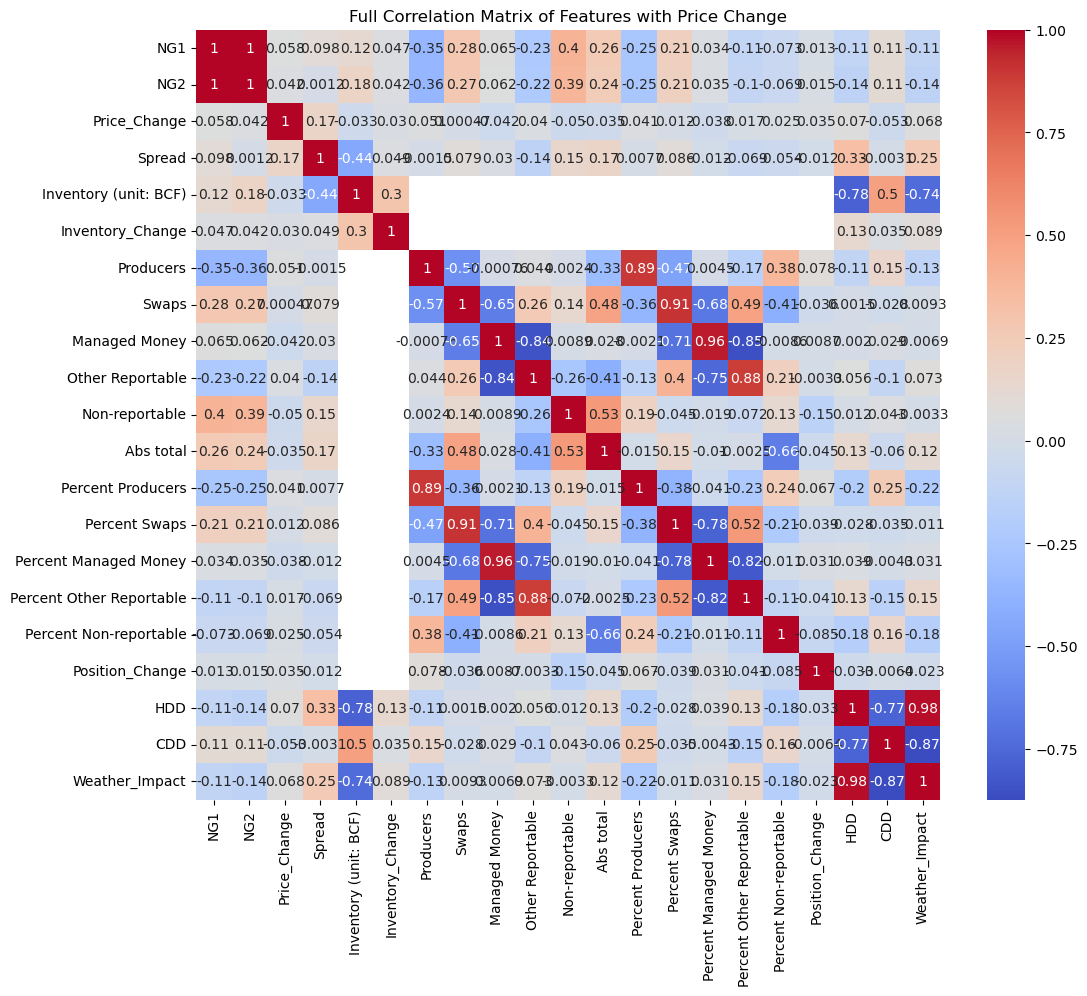

In [2]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Full Correlation Matrix of Features with Price Change')
plt.show()

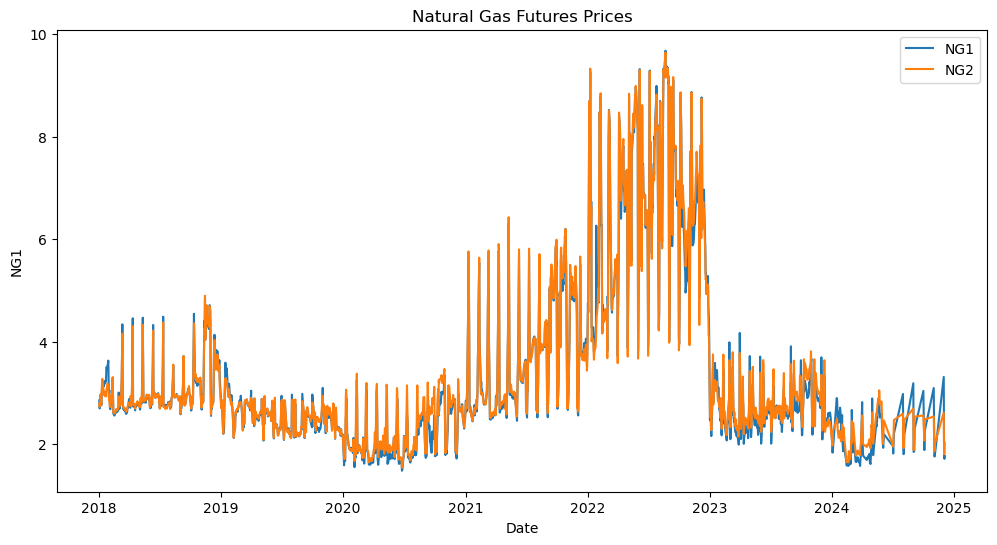

In [3]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='NG1', data=ng1, label='NG1')
sns.lineplot(x='Date', y='NG2', data=ng1, label='NG2')
plt.title('Natural Gas Futures Prices')
plt.legend()
plt.show()